**Problem Statement 3 :**

Implement the following algorithms from scratch using numpy only and using the data from Question 2, and only one “for loop”

a. Linear Regression using Gradient Descent

b. Logistic Regression using Gradient Descent

c. Linear Regression with L1 and L2 Regularization

d. Logistic Regression with L1 and L2 Regularization

e. K-Means

In [1]:
from google.colab import files
import random
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn import datasets
file=files.upload()

Saving Logistic_Regression_Dataset.csv to Logistic_Regression_Dataset.csv
Saving Linear_Regression_Dataset.csv to Linear_Regression_Dataset.csv
Saving Data_Set_K_Means.csv to Data_Set_K_Means.csv


[2.9616078616756867, 2.842840660306701, 2.728967837889114, 2.6197869576108532, 2.515103986480023, 2.414732945176389, 2.318495572544774, 2.226221004115911, 2.137745464066187, 2.0529119700524863, 1.9715700503820663, 1.8935754730001728, 1.8187899857997998, 1.747081067778931, 1.67832169059052, 1.6123900900496047, 1.5491695471802938, 1.488548178402877, 1.4304187344781596, 1.3746784078421779, 1.3212286479799005, 1.2699749845012893, 1.220826857597214, 1.1736974555662991, 1.128503559116734, 1.085165392159517, 1.0436064788215196, 1.0037535064181473, 0.9655361941363148, 0.9288871671889011, 0.8937418362118904, 0.860038281684998, 0.827717143165772, 0.7967215131359893, 0.7669968352675852, 0.7384908069234518, 0.7111532857161775, 0.6849361999552245, 0.6597934628201406, 0.6356808901042124, 0.6125561213794839, 0.5903785444403211, 0.5691092228886687, 0.5487108267298979, 0.5291475658536199, 0.5103851262791065, 0.4923906090500026, 0.47513247166782957, 0.45858047195842305, 0.44270561426985755, 0.4274800979

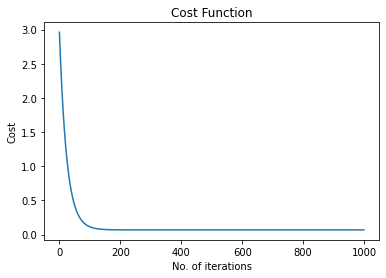

In [3]:
# Linear Regression Using Gradient Descent
def Linear_Regression_Using_Batch_Gradient_Descent(lr, weights, epochs, x, y):
    costs = []
    for _ in range(epochs):
        prediction = np.dot(x, weights)
        error = prediction - y
        cost = 1 / (len(x)) * np.dot(error.T, error)
        costs.append(cost)
        weights = weights - (lr * (1 / len(x)) * np.dot(x.T, error))
    return weights, costs


def MSE(y, predicted):
    error = y - predicted
    return 1 / (len(y)) * np.dot(error.T, error)


np.random.seed(123)
data = pd.read_csv("Linear_Regression_Dataset.csv")
v = len(data.columns)
X = data.iloc[:, 1:v - 1].values
thetas = np.random.rand(len(X[0]) + 1)

# Appending 1 for intercept purpose
X = np.c_[np.ones(X.shape[0]), X]
Y = data.iloc[:, v - 1].values

# Splitting Data_Sets
val = len(X) // 3
X_train = X[val:]
X_test = X[: val]
Y_train = Y[val:]
Y_test = Y[: val]

theta_, past_cost = Linear_Regression_Using_Batch_Gradient_Descent(0.021, thetas, 1000, X_train, Y_train)
# print(past_cost)
# print(theta_)

# Plot the cost function...
plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_cost)
plt.show()




In [4]:
predictions = []
c = theta_[0]
for i in X_test:
    s = 0
    for j in range(0, len(i) - 1):
        # print(j)
        s = s + (theta_[j + 1] * i[j + 1])
    s += c
    predictions.append(s)

# print(predictions)
# print(Y_test)
print("MSE : ", MSE(Y_test, predictions))


MSE :  0.06008903482954336


[0.693147180559947, 0.657085855745475, 0.6252765045192398, 0.5971625034860634, 0.5722373065583931, 0.5500537677618914, 0.53022525300398, 0.5124218530711487, 0.49636423608142477, 0.4818167839898883, 0.4685809393708003, 0.4564892054503688, 0.4453999542811506, 0.4351930436175316, 0.42576617056136556, 0.4170318635431143, 0.4089150114759421, 0.4013508371885148, 0.39428323459829756, 0.3876634020422714, 0.3814487161414588, 0.37560180094326556, 0.3700897557618523, 0.36488351224712967, 0.3599572969671156, 0.3552881804107251, 0.35085569701636, 0.34664152378579083, 0.34262920740227215, 0.33880393165834805, 0.3351523185099528, 0.3316622572868052, 0.3283227575661582, 0.3251238220061274, 0.3220563360743189, 0.3191119721274614, 0.316283105721967, 0.31356274238268766, 0.3109444533424771, 0.3084223190004458, 0.30599087904135125, 0.30364508832011594, 0.3013802777499457, 0.2991921195448726, 0.2970765962617241, 0.2950299731656658, 0.2930487735101996, 0.29112975637895244, 0.2892698967844323, 0.287466367759

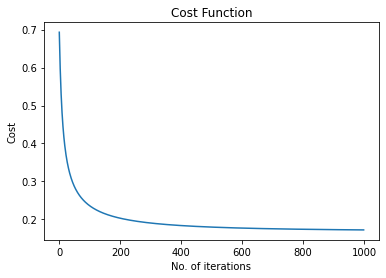

In [6]:
# Logistic Regression Using Gradient Descent
def Logistic_Regression_Using_Gradient_Descent(lr, weights, epochs, x, y):
    costs = []
    for _ in range(epochs):
        prediction = np.dot(x, weights)
        sigmoid = 1 / (1 + np.exp(-prediction))
        error = sigmoid - y
        cost = (-y) * np.log(sigmoid) - (1 - y) * np.log(1 - sigmoid)
        cost = sum(cost) / len(x)
        costs.append(cost)
        weights = weights - (lr * (1 / len(x)) * np.dot(x.T, error))
    return weights, costs


def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / len(actual) * 100.0


np.random.seed(123)
data = pd.read_csv("Logistic_Regression_Dataset.csv")
v = len(data.columns)
X = data.iloc[:, 1:v - 1].values
# thetas = np.random.rand(len(X[0]))
thetas = np.zeros(len(X[0]))
Y = data.iloc[:, v - 1].values

# Splitting Data_Sets
val = len(X) // 3
X_train = X[val:]
X_test = X[: val]
Y_train = Y[val:]
Y_test = Y[: val]

theta_, past_cost = Logistic_Regression_Using_Gradient_Descent(0.25, thetas, 1000, X_train, Y_train)
# print(past_cost)
# print(theta_)

# Plot the cost function...
plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_cost)
plt.show()


In [8]:
predictions = []
for i in X_test:
    s = 0
    for j in range(0, len(i)):
        # print(j)
        s = s + (theta_[j] * i[j])
    z = round(1 / (1 + np.exp(-s)))
    predictions.append(z)
# print(predictions)
# print(Y_test)
print("Accuracy = ", accuracy_metric(Y_test, predictions))


Accuracy =  90.09009009009009


[-1.08385591  0.98515686  0.28436128]
[-1.08211553  0.9732683   0.28570661]
[-1.08040887  0.96167237  0.28701549]
[-1.0787353   0.95036187  0.2882889 ]
[-1.07709425  0.93932975  0.28952777]
[-1.07548511  0.92856916  0.29073302]
[-1.07390732  0.9180734   0.29190556]
[-1.0723603   0.90783595  0.29304625]
[-1.0708435   0.89785044  0.29415594]
[-1.06935636  0.88811067  0.29523547]
[-1.06789835  0.87861059  0.29628563]
[-1.06646893  0.86934427  0.29730722]
[-1.06506758  0.86030598  0.29830099]
[-1.06369378  0.85149008  0.29926768]
[-1.06234702  0.8428911   0.30020803]
[-1.06102681  0.83450369  0.30112274]
[-1.05973265  0.82632265  0.30201249]
[-1.05846406  0.81834288  0.30287795]
[-1.05722057  0.81055944  0.30371978]
[-1.0560017   0.80296748  0.3045386 ]
[-1.05480701  0.79556229  0.30533503]
[-1.05363604  0.78833927  0.30610968]
[-1.05248833  0.78129393  0.30686312]
[-1.05136347  0.77442189  0.30759593]
[-1.05026102  0.76771889  0.30830867]
[-1.04918055  0.76118076  0.30900186]
[-1.04812165

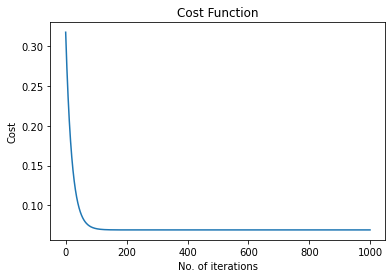

In [10]:
# Linear Regression Using L1_L2_Regularization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Linear Regression Using L1 and L2 Regularization
def L1_L2_Regularization_Linear_Regression(x, y, epochs, lr, weight):
    l1 = 0.4
    l2 = 1 - l1
    costs = []
    for _ in range(epochs):
        prediction = np.dot(x, weight)
        error = prediction - y
        cost = 1 / (len(x)) * np.dot(error.T, error)
        costs.append(cost)
        weight = weight - (lr * (x.T.dot(error) + l1 * np.sign(weight) + l2 * 2 * weight) * 1 / len(x))
        print(weight)
    return costs, weight


def MSE(y, predicted):
    error = y - predicted
    return 1 / (len(y)) * np.dot(error.T, error)


np.random.seed(123)
data = pd.read_csv("Linear_Regression_Dataset.csv")
v = len(data.columns)
X = data.iloc[:, 1:v - 1].values
thetas = np.random.randn(len(X[0]) + 1)
# print(thetas)
# Appending 1 for intercept purpose
X = np.c_[np.ones(X.shape[0]), X]
Y = data.iloc[:, v - 1].values

# Splitting Data_Sets
val = len(X) // 3
X_train = X[val:]
X_test = X[: val]
Y_train = Y[val:]
Y_test = Y[: val]
cost_val, weights = L1_L2_Regularization_Linear_Regression(X_train, Y_train, 1000, 0.025, thetas)
plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_val)
plt.show()




In [11]:
predictions = []
c = weights[0]
for i in X_test:
    s = 0
    for j in range(0, len(i) - 1):
        # print(j)
        s = s + (weights[j + 1] * i[j + 1])
    s += c
    predictions.append(s)

# print(predictions)
# print(Y_test)
print("MSE : ", MSE(Y_test, predictions))


MSE :  0.06005140108972094


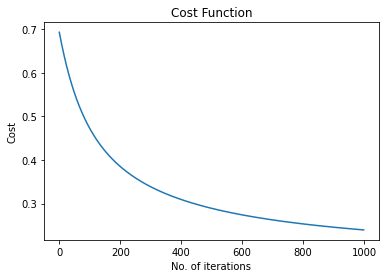

In [12]:
# Logistic Regression Using L1 and L2 Regularization
def Logistic_Regression_Using_Gradient_Descent(lr, weights, epochs, x, y):
    l1 = 0.4
    l2 = 1 - l1
    costs = []
    for _ in range(epochs):
        prediction = np.dot(x, weights)
        sigmoid = 1 / (1 + np.exp(-prediction))
        error = sigmoid - y
        cost = (-y) * np.log(sigmoid) - (1 - y) * np.log(1 - sigmoid)
        cost = sum(cost) / len(x)
        costs.append(cost)
        weights = weights - (lr * (x.T.dot(error) + l1 * np.sign(weights) + l2 * 2 * weights) * 1 / len(x))
    return weights, costs


def accuracy_metric(actual, predicted):
    correct = 0
    for value in range(len(actual)):
        if actual[value] == predicted[value]:
            correct += 1
    return correct / len(actual) * 100.0


np.random.seed(123)
data = pd.read_csv("Logistic_Regression_Dataset.csv")
v = len(data.columns)
X = data.iloc[:, 1:v - 1].values
# thetas = np.random.rand(len(X[0]))
thetas = np.zeros(len(X[0]))
Y = data.iloc[:, v - 1].values

# Splitting Data_Sets
val = len(X) // 3
X_train = X[val:]
X_test = X[: val]
Y_train = Y[val:]
Y_test = Y[: val]

theta_, past_cost = Logistic_Regression_Using_Gradient_Descent(0.025, thetas, 1000, X_train, Y_train)
# print(past_cost)
# print(theta_)

# Plot the cost function...
plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_cost)
plt.show()



In [13]:
predictions = []
for i in X_test:
    s = 0
    for j in range(0, len(i)):
        # print(j)
        s = s + (theta_[j] * i[j])
    z = round(1 / (1 + np.exp(-s)))
    predictions.append(z)
# print(predictions)
# print(Y_test)
print("Accuracy = ", accuracy_metric(Y_test, predictions))



Accuracy =  90.09009009009009


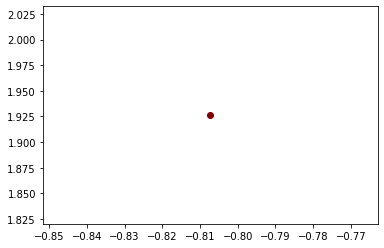

cluster 0 -----> [[-8.07235843e-01]
 [-1.50016563e+00]
 [-1.10905031e+00]
 [-2.53122673e+00]
 [-7.66086119e-01]
 [-7.30000112e-01]
 [ 7.37550178e-01]
 [-2.66880543e+00]
 [-1.22938966e+00]
 [-1.50555730e-01]
 [-2.25083272e+00]
 [-2.76525282e-01]
 [ 3.16213758e-01]
 [-2.39576656e+00]
 [-3.07515834e+00]
 [ 6.07088241e-01]
 [ 7.59320509e-01]
 [-5.64526936e-01]
 [-3.03419095e-01]
 [-4.47790830e-01]
 [-1.22819035e+00]
 [-2.04952343e+00]
 [-1.88801715e+00]
 [-2.16762974e+00]
 [-2.62913420e+00]
 [-9.75534023e-01]
 [ 5.93534833e-01]
 [-6.57897670e-01]
 [ 2.56665690e-01]
 [-1.25123746e+00]
 [-2.50379940e+00]
 [-1.06052444e+00]
 [-2.53221589e+00]
 [-1.06610969e+00]
 [-1.37946961e+00]
 [-7.79620505e-01]
 [-1.33417502e+00]
 [-5.05679270e-01]
 [ 6.67257109e-01]
 [-1.44072717e+00]
 [-2.89166224e+00]
 [-2.66335168e-01]
 [-3.13334370e+00]
 [-2.25777760e+00]
 [-1.81085181e-01]
 [ 3.03809631e-01]
 [ 7.08536542e-01]
 [ 6.75068326e-02]
 [ 2.98244297e-01]
 [-2.41668433e-01]
 [-9.72776435e-01]
 [-1.45830479e

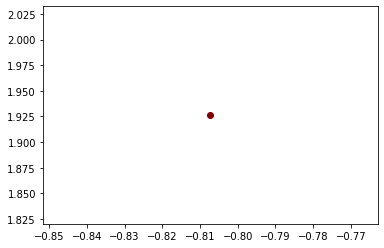

cluster 0 -----> [[-8.07235843e-01]
 [ 1.92635850e+00]
 [-1.50016563e+00]
 [-1.10905031e+00]
 [-2.53122673e+00]
 [ 1.26659827e+00]
 [-7.66086119e-01]
 [-7.30000112e-01]
 [ 1.97015192e+00]
 [ 2.29540695e+00]
 [ 7.37550178e-01]
 [-2.66880543e+00]
 [-1.22938966e+00]
 [-1.50555730e-01]
 [ 1.01490063e+00]
 [ 2.57852926e+00]
 [-2.25083272e+00]
 [ 1.24167152e+00]
 [-2.76525282e-01]
 [ 3.16213758e-01]
 [-2.39576656e+00]
 [ 2.59604111e+00]
 [-3.07515834e+00]
 [ 6.07088241e-01]
 [ 7.59320509e-01]
 [-5.64526936e-01]
 [-3.03419095e-01]
 [-4.47790830e-01]
 [ 2.80925899e+00]
 [ 2.27773069e+00]
 [-1.22819035e+00]
 [-2.04952343e+00]
 [-1.88801715e+00]
 [ 2.10290600e+00]
 [-2.16762974e+00]
 [ 2.77525125e+00]
 [ 2.33958204e+00]
 [-2.62913420e+00]
 [ 1.55916519e+00]
 [ 2.53216589e+00]
 [ 1.60396448e+00]
 [ 1.99362947e+00]
 [-9.75534023e-01]
 [ 5.93534833e-01]
 [ 2.38013714e+00]
 [ 1.98214788e+00]
 [ 2.47784789e+00]
 [-6.57897670e-01]
 [ 1.74952306e+00]
 [ 2.58946869e+00]
 [ 1.15369622e+00]
 [ 2.56665690e

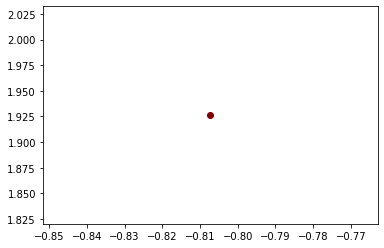

cluster 0 -----> [[-8.07235843e-01]
 [-1.50016563e+00]
 [-1.10905031e+00]
 [-2.53122673e+00]
 [-7.66086119e-01]
 [-7.30000112e-01]
 [-2.66880543e+00]
 [-1.22938966e+00]
 [-1.50555730e-01]
 [-2.25083272e+00]
 [-2.76525282e-01]
 [ 3.16213758e-01]
 [-2.39576656e+00]
 [-3.07515834e+00]
 [ 6.07088241e-01]
 [-5.64526936e-01]
 [-3.03419095e-01]
 [-4.47790830e-01]
 [-1.22819035e+00]
 [-2.04952343e+00]
 [-1.88801715e+00]
 [-2.16762974e+00]
 [-2.62913420e+00]
 [-9.75534023e-01]
 [ 5.93534833e-01]
 [-6.57897670e-01]
 [ 2.56665690e-01]
 [-1.25123746e+00]
 [-2.50379940e+00]
 [-1.06052444e+00]
 [-2.53221589e+00]
 [-1.06610969e+00]
 [-1.37946961e+00]
 [-7.79620505e-01]
 [-1.33417502e+00]
 [-5.05679270e-01]
 [ 6.67257109e-01]
 [-1.44072717e+00]
 [-2.89166224e+00]
 [-2.66335168e-01]
 [-3.13334370e+00]
 [-2.25777760e+00]
 [-1.81085181e-01]
 [ 3.03809631e-01]
 [ 7.08536542e-01]
 [ 6.75068326e-02]
 [ 2.98244297e-01]
 [-2.41668433e-01]
 [-9.72776435e-01]
 [-1.45830479e+00]
 [ 2.31010865e-01]
 [-1.67567017e

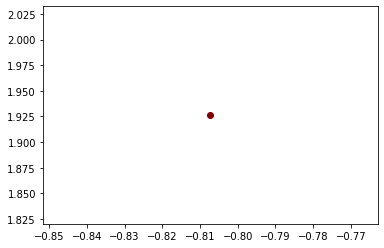

cluster 0 -----> [[-0.80723584]
 [-1.10905031]
 [-0.76608612]
 [-0.73000011]
 [ 0.73755018]
 [-1.22938966]
 [-0.15055573]
 [ 1.01490063]
 [-0.27652528]
 [ 0.31621376]
 [ 0.60708824]
 [ 0.75932051]
 [-0.56452694]
 [-0.30341909]
 [-0.44779083]
 [-1.22819035]
 [-0.97553402]
 [ 0.59353483]
 [-0.65789767]
 [ 0.25666569]
 [ 0.95284697]
 [-1.25123746]
 [-1.06052444]
 [-1.06610969]
 [-0.7796205 ]
 [-0.50567927]
 [ 0.66725711]
 [ 0.87781755]
 [-0.26633517]
 [-0.18108518]
 [ 0.30380963]
 [ 0.70853654]
 [ 0.06750683]
 [ 0.2982443 ]
 [ 0.89033931]
 [-0.24166843]
 [ 1.02378506]
 [-0.97277643]
 [ 0.23101087]
 [-0.31658683]
 [ 0.33977914]
 [ 0.9615376 ]
 [-0.05797276]
 [ 0.57309313]
 [-1.06959437]
 [-0.16353238]
 [ 0.95194395]
 [ 0.58388108]
 [-1.28013799]
 [ 0.28170222]
 [ 0.61157653]
 [-1.26333398]
 [-1.12601833]
 [-0.4727261 ]
 [ 0.24722542]
 [-0.24916544]
 [-0.79226837]
 [ 0.90765658]
 [-0.33025677]
 [ 0.4305581 ]
 [ 0.90802847]
 [-0.53599484]
 [-0.10492845]
 [ 0.03182382]
 [ 0.7693664 ]
 [ 0.301

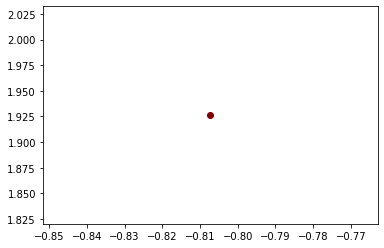

cluster 0 -----> [[1.9263585 ]
 [1.26659827]
 [1.97015192]
 [2.29540695]
 [1.01490063]
 [1.24167152]
 [2.27773069]
 [2.102906  ]
 [2.33958204]
 [1.55916519]
 [1.60396448]
 [1.99362947]
 [1.98214788]
 [1.74952306]
 [1.15369622]
 [0.95284697]
 [1.5001611 ]
 [2.26195803]
 [1.75478874]
 [1.42875917]
 [1.65403281]
 [1.74806063]
 [1.25078644]
 [1.5227776 ]
 [1.28933778]
 [2.27244715]
 [2.12275978]
 [1.02378506]
 [2.25323481]
 [1.67004323]
 [1.92352205]
 [0.9615376 ]
 [0.95194395]
 [2.00520557]
 [1.7907899 ]
 [1.64856484]
 [1.997798  ]
 [1.77844453]
 [1.88644899]
 [2.07592967]
 [0.90765658]
 [0.90802847]
 [1.66608824]
 [1.4424365 ]
 [1.9187382 ]
 [1.59034945]
 [1.85210284]
 [1.27290055]
 [1.43940041]
 [1.40252881]
 [0.96058797]
 [2.27477708]
 [1.73033256]
 [1.99668097]
 [1.20187873]
 [1.07399505]
 [1.54356036]
 [1.64265316]
 [1.74767603]
 [2.10684246]
 [1.43368568]
 [1.25212613]
 [1.33532699]
 [1.11822324]
 [1.29739666]
 [2.26225409]
 [1.18454506]
 [1.1588978 ]
 [1.34709508]
 [2.2944131 ]
 [1

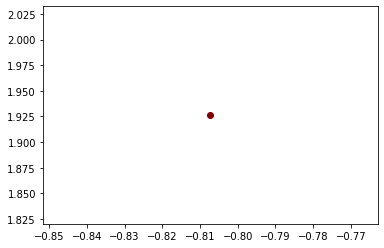

cluster 0 -----> [[-1.50016563]
 [-2.53122673]
 [-2.66880543]
 [-2.25083272]
 [-2.39576656]
 [-3.07515834]
 [-2.04952343]
 [-1.88801715]
 [-2.16762974]
 [-2.6291342 ]
 [-2.5037994 ]
 [-2.53221589]
 [-1.37946961]
 [-1.33417502]
 [-1.44072717]
 [-2.89166224]
 [-3.1333437 ]
 [-2.2577776 ]
 [-1.45830479]
 [-1.67567017]
 [-1.66959173]
 [-1.50827664]
 [-1.7662006 ]
 [-1.51671849]
 [-1.51928651]
 [-1.58719155]
 [-1.79811135]
 [-1.566172  ]
 [-2.03783019]
 [-1.4263228 ]
 [-1.95736593]
 [-2.02269951]
 [-1.83285659]
 [-1.60771563]
 [-1.32791452]
 [-2.28926555]
 [-1.41416607]
 [-1.39331683]
 [-2.2996759 ]
 [-4.52151687]
 [-3.32435982]
 [-3.17612099]
 [-1.31166355]
 [-1.85346499]
 [-1.99439719]
 [-2.77949735]
 [-1.69015896]
 [-1.99434502]
 [-2.16985657]
 [-1.95560608]
 [-2.26777072]
 [-2.33562155]
 [-3.64808046]
 [-1.38790374]
 [-2.34217967]
 [-2.56750324]
 [-3.15322595]
 [-2.20649706]
 [-1.64731065]
 [-1.31431697]
 [-1.50798191]
 [-1.48582179]
 [-3.25718007]
 [-1.48799531]
 [-2.89994656]
 [-3.131

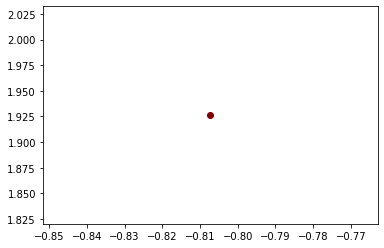

cluster 0 -----> [[1.9263585 ]
 [1.97015192]
 [2.29540695]
 [2.57852926]
 [2.59604111]
 [2.80925899]
 [2.27773069]
 [2.102906  ]
 [2.77525125]
 [2.33958204]
 [2.53216589]
 [1.99362947]
 [2.38013714]
 [1.98214788]
 [2.47784789]
 [2.58946869]
 [3.09436396]
 [2.26195803]
 [3.67332179]
 [2.52570067]
 [3.13950603]
 [2.66237919]
 [2.27244715]
 [2.12275978]
 [2.25323481]
 [1.92352205]
 [2.78692645]
 [2.38580026]
 [2.9262293 ]
 [2.00520557]
 [3.63413272]
 [1.997798  ]
 [2.50904929]
 [2.07592967]
 [3.28018678]
 [1.9187382 ]
 [2.72583797]
 [2.47075462]
 [2.27477708]
 [1.99668097]
 [4.58163576]
 [2.59186404]
 [2.10684246]
 [3.08570579]
 [2.26225409]
 [2.71514276]
 [2.2944131 ]
 [3.23557903]
 [2.12985393]
 [2.652174  ]
 [2.09503426]
 [3.01596092]
 [2.6112302 ]
 [1.9404922 ]
 [1.92702555]
 [3.27665248]
 [2.93218239]
 [4.20484206]
 [1.91931617]
 [2.74569655]
 [3.87718262]
 [2.99139667]
 [3.42625653]
 [2.30807103]
 [1.91301254]
 [3.57402686]
 [3.82992608]
 [2.82594058]
 [2.41477192]
 [2.58421114]
 [2

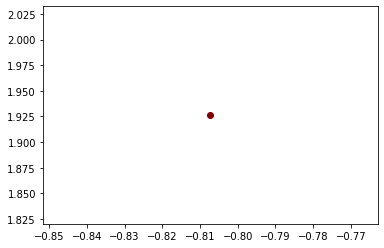

cluster 0 -----> [[-2.53122673]
 [-2.66880543]
 [-2.25083272]
 [-2.39576656]
 [-3.07515834]
 [-2.16762974]
 [-2.6291342 ]
 [-2.5037994 ]
 [-2.53221589]
 [-2.89166224]
 [-3.1333437 ]
 [-2.2577776 ]
 [-2.28926555]
 [-2.2996759 ]
 [-4.52151687]
 [-3.32435982]
 [-3.17612099]
 [-2.77949735]
 [-2.16985657]
 [-2.26777072]
 [-2.33562155]
 [-3.64808046]
 [-2.34217967]
 [-2.56750324]
 [-3.15322595]
 [-2.20649706]
 [-3.25718007]
 [-2.89994656]
 [-3.13164254]
 [-2.89206689]
 [-2.5386781 ]
 [-3.08490254]
 [-2.52026539]
 [-2.36653646]
 [-2.18684672]
 [-2.36276008]
 [-2.73063921]
 [-2.11099756]
 [-3.11835189]
 [-2.3620967 ]
 [-2.48406211]
 [-3.05982507]
 [-2.30119909]
 [-2.38214447]
 [-2.31600619]
 [-2.45081603]
 [-2.12505447]
 [-2.82725085]
 [-2.5100222 ]
 [-2.13074357]
 [-2.18018872]
 [-3.25013226]
 [-3.16532764]
 [-2.78669136]
 [-3.96446837]
 [-2.90208849]
 [-2.66049684]
 [-2.17395754]
 [-3.21142127]
 [-3.146264  ]
 [-2.09240182]
 [-2.60624718]
 [-2.64385357]
 [-3.191077  ]
 [-3.21927445]
 [-2.151

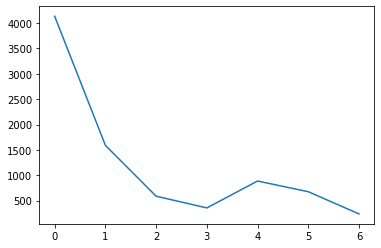

In [29]:
# K - Means Using Random Centroids From Scratch
def K_Means(x, no_of_clusters):
    centroids = np.array([]).reshape(len(x[0]), 0)
    # print(centroids)
    for i in range(no_of_clusters):
        random_val = random.randint(0, len(x) - 1)
        centroids = np.c_[centroids, x[random_val]]
    # print(centroids)
    distance = euclidean_distance(centroids, no_of_clusters, len(x), x)
    plt.scatter(x[0], x[1], c='maroon')
    plt.show()
    color = ['red', 'blue', 'green', 'black', 'purple', 'orange', 'brown', 'pink', 'neon']
    if len(x[0]) == 2:
        for k in range(no_of_clusters):
            plt.scatter(x=distance[k][:, 0], y=distance[k][:, 1], c=color[k])
        plt.scatter(centroids[0, :], centroids[1, :], color='yellow')
        # plt.show()
    for va in distance.keys():
        print("cluster {} -----> {}".format(va, distance[va]))
    return centroids, distance


def euclidean_distance(centroids, no_of_clusters, length, x):
    euclidean = np.array([]).reshape(length, 0)
    for i in range(no_of_clusters):
        distance = np.sum((x - centroids[:, i]) ** 2, axis=1)
        euclidean = np.c_[euclidean, distance]

    # print(euclidean)
    index = np.argmin(euclidean, axis=1)
    # print(index)
    distances = {}
    for k in range(no_of_clusters):
        distances[k] = np.array([]).reshape(len(x[0]), 0)
    for i in range(length):
        distances[index[i]] = np.c_[distances[index[i]], x[i]]
    for k in range(no_of_clusters):
        distances[k] = distances[k].T
    return distances


def weighted_sum_of_squares(x):
    weighted_sum_squares = []
    for va in range(1, 8):
        centroids, distance = K_Means(x, va)
        weighted_sum_square = 0
        for k in range(va):
            weighted_sum_square += np.sum((distance[k] - centroids[:, k]) ** 2)
        weighted_sum_squares.append(weighted_sum_square)

    plt.plot(weighted_sum_squares)
    plt.show()


data = pd.read_csv("Data_Set_K_Means.csv")
val = len(data.columns)
X = data.iloc[:, 1: val - 1].values
Y = data.iloc[:, val - 1].values
# print(len(X[0]))
K_Means(X, 3)
weighted_sum_of_squares(X)